In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs#添加地图投影
import cartopy.feature as cfeature#添加地图特征（湖泊，海岸线）
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER#设置地理坐标
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader
import os

OSError: [WinError 126] 找不到指定的模块。

d:\miniconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
d:\miniconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


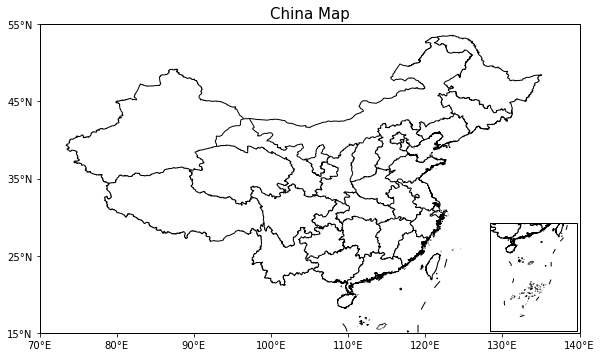

In [2]:

#建立画布
fig2 = plt.figure(figsize=(15,15))
#设置一个圆柱投影坐标，中心经度115
proj = ccrs.PlateCarree(central_longitude=115)
#设置地图边界范围
leftlon,rightlon, lowerlat, upperlat=(70,140,15,55)
#绘制地图
f2_ax1 = fig2.add_axes([0.1,0.1,0.5,0.3],projection=proj)
#在画布的绝对坐标建立子图
f2_ax1.set_extent([leftlon,rightlon,lowerlat,upperlat],crs=ccrs.PlateCarree())

# # 海岸线 50m
# coastline = cfeature.NaturalEarthFeature('physical','coastline','10m',edgecolor='face',facecolor = cfeature.COLORS['land'])
# f2_ax1.add_feature(coastline)
# # 湖泊数据
# lakes = cfeature.NaturalEarthFeature("physical",'lakes','10',edgecolor='face',facecolor = cfeature.COLORS['water'])
# f2_ax1.add_feature(lakes,alpha=0.5)

#定义地理坐标标签格式
f2_ax1.set_xticks(np.arange(leftlon,rightlon+10,10),crs=ccrs.PlateCarree())
f2_ax1.set_yticks(np.arange(lowerlat,upperlat+10,10),crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
f2_ax1.xaxis.set_major_formatter(lon_formatter)
f2_ax1.yaxis.set_major_formatter(lat_formatter)
#设置标题
f2_ax1.set_title('China Map',loc='center',fontsize =15)
#读取shp文件
os.chdir("C:/Users/2019/Desktop/1a/data/China_adm_shp/bou2_4m/")
china = shpreader.Reader('bou2_4l.dbf').geometries()
#绘制中国国界省界九段线等
f2_ax1.add_geometries(china,ccrs.PlateCarree(),facecolor='none',edgecolor='black',zorder=1)
#添加南海
f2_ax2 = fig2.add_axes([0.5175, 0.0935, 0.08, 0.13],projection=proj)
f2_ax2.set_extent([105, 125, 0, 25],crs=ccrs.PlateCarree())
# f2_ax2.add_feature(coastline)
china = shpreader.Reader('bou2_4l.dbf').geometries()
f2_ax2.add_geometries(china,ccrs.PlateCarree(),facecolor='none',edgecolor='black',zorder=1)
plt.savefig("cartopy_example1.tif",dpi=300)
plt.show()